In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, confusion_matrix ,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPClassifier

In [2]:
credit_card_data=pd.read_csv(r"C:\Users\maher\Desktop\creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#distribution of legit transactions and fruadulent
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

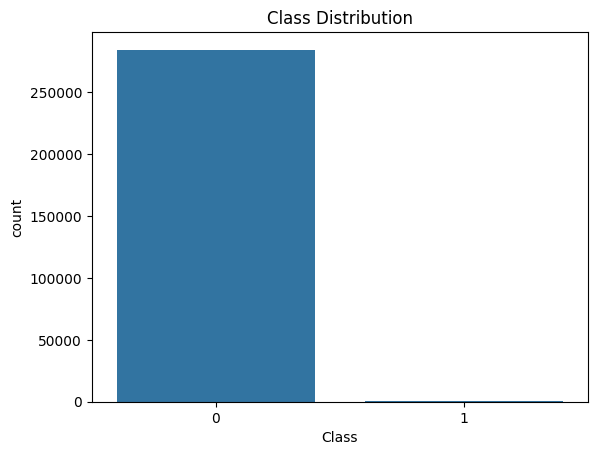

In [6]:
# Plot class distribution
sns.countplot(x='Class', data=credit_card_data)
plt.title("Class Distribution")
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

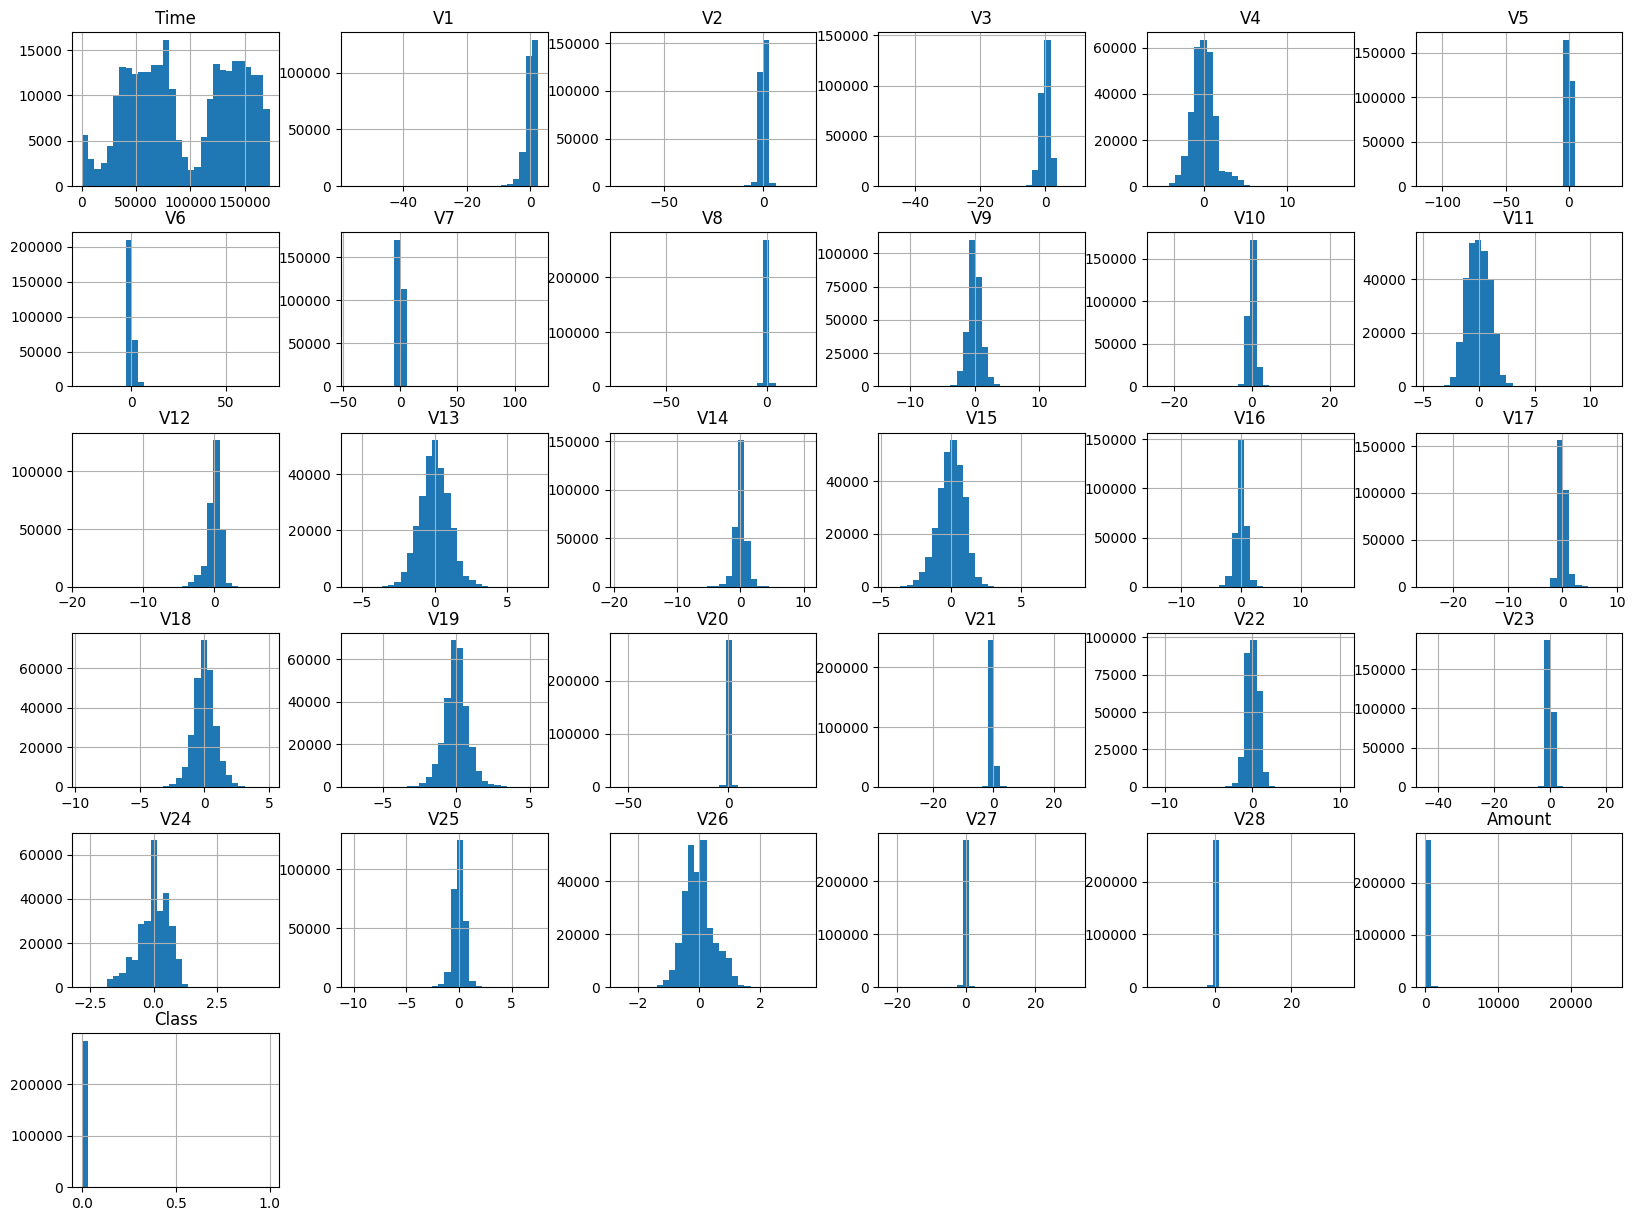

In [7]:
credit_card_data.hist(bins=30,figsize=(20,15))

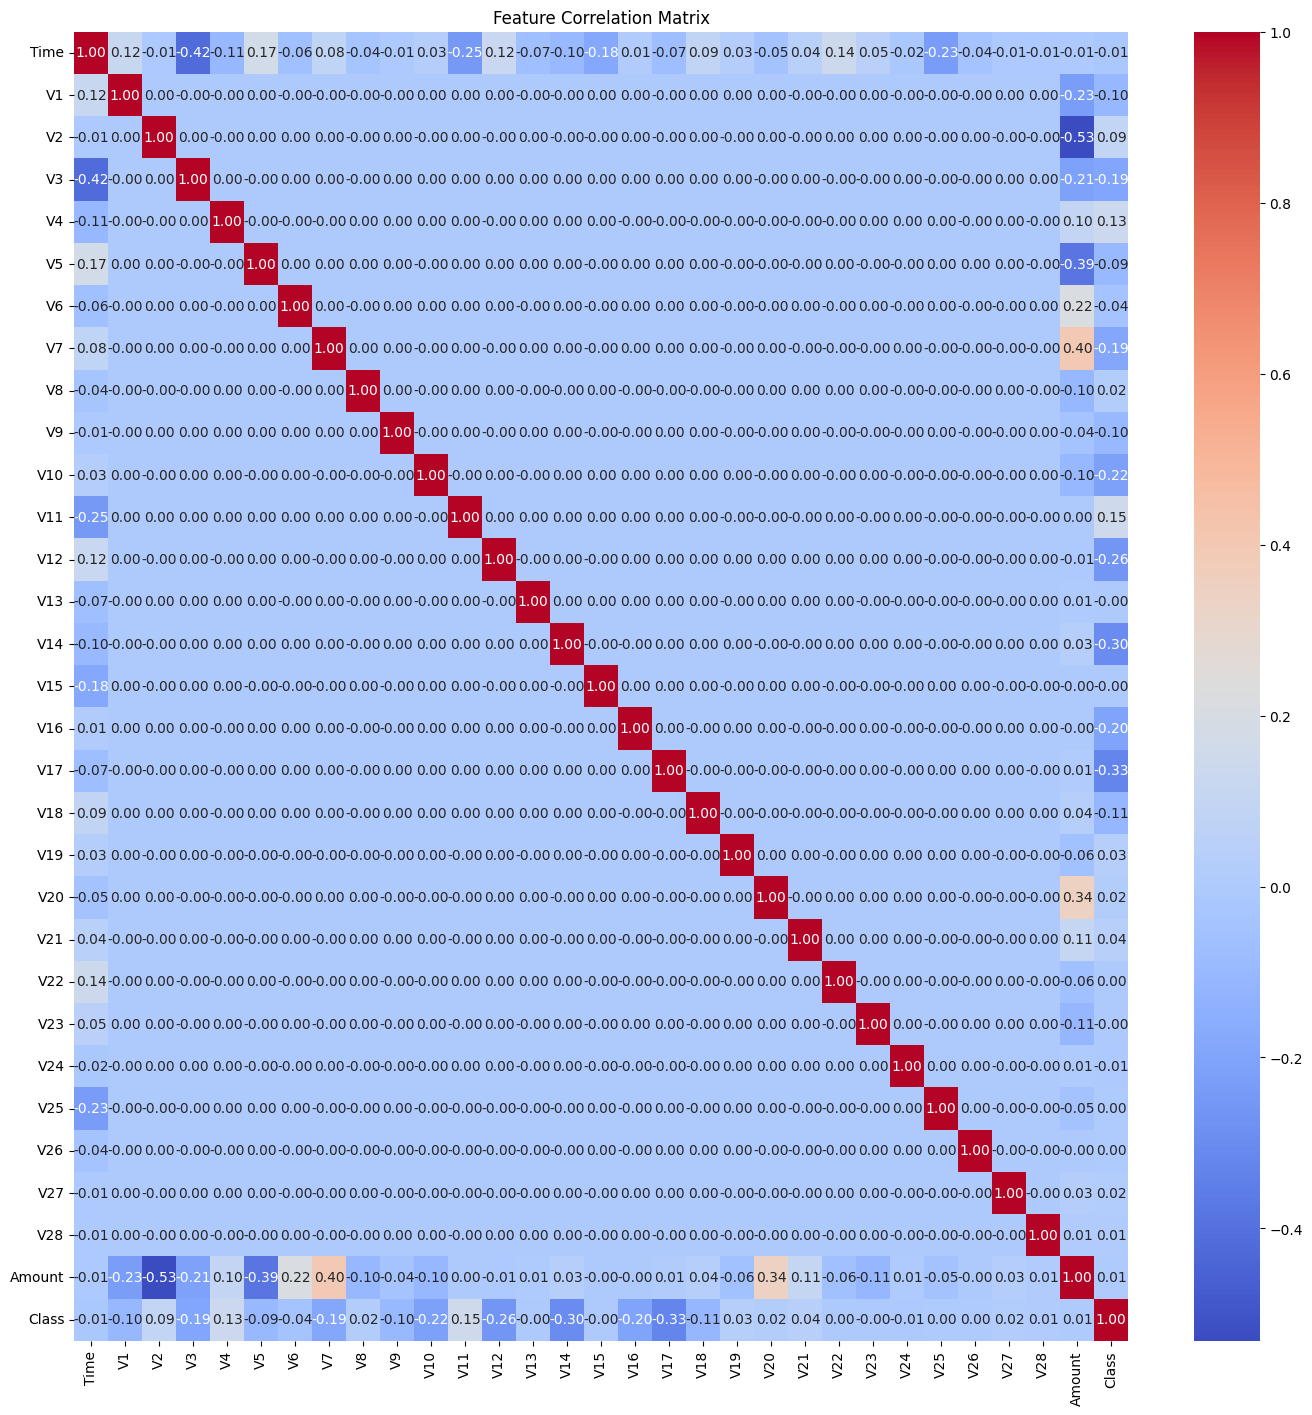

In [8]:
plt.figure(figsize=(17, 17))
corr_matrix = credit_card_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
#separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#statistical measures 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#concatenate 
legit_sample=legit.sample(n=492)

In [14]:
new_dataset=pd.concat([legit_sample,fraud],axis=0) 

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202305,134263.0,1.977172,0.158234,-1.905492,1.368581,0.553462,-1.260907,0.839924,-0.486382,0.054412,...,0.167567,0.594906,-0.119509,-0.067386,0.581911,-0.382422,-0.036854,-0.061928,47.70,0
279453,168876.0,1.228245,-1.602271,-0.397963,0.917363,-1.215910,-0.225788,-0.116385,-0.121249,1.737767,...,0.026998,-0.349841,-0.031661,0.061026,-0.362845,-0.908278,0.017899,0.039893,379.00,0
50659,44588.0,1.141484,-0.721486,0.491110,-1.535303,-1.138114,-0.661769,-0.581197,0.073268,1.493905,...,0.066156,0.076605,-0.087888,0.022975,0.263667,-0.077383,0.009136,0.022464,70.75,0
27586,34612.0,1.115923,-0.208065,1.272632,1.244066,-1.095039,0.070824,-0.797603,0.346743,0.923676,...,-0.035142,-0.015426,0.008990,0.274308,0.321104,-0.419127,0.056912,0.023216,5.50,0
137652,82265.0,-0.613330,-0.422210,1.237914,-0.673271,-0.923926,1.134738,-1.350590,-2.256207,0.433713,...,-1.349851,-0.175109,-0.207654,-0.248587,0.748260,0.891561,-0.116785,0.125566,210.08,0


In [16]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
x=new_dataset[['V14', 'V16', 'V17', 'V12', 'V11', 'V7','V20', 'V3','V9','V1','V2','V4','Time','Amount']]
y=new_dataset['Class']

In [18]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 4. Split into Train (60%), Validation (20%), and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [19]:
print(f"Train size: {len(X_train)} | Validation size: {len(X_val)} | Test size: {len(X_test)}")

Train size: 590 | Validation size: 197 | Test size: 197


In [20]:
# Helper function for evaluation
def evaluate_model(model, X, y, name):
    y_pred = model.predict(X)
    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("Classification Report:\n", classification_report(y, y_pred, digits=4))

In [21]:
for i in [100, 500, 1000, 2000, 5000]:
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    print(f"max_iter = {i}, Train Accuracy = {model.score(X_train, y_train):.4f}")
    print(f"max_iter = {i}, Test Accuracy = {model.score(X_test, y_test):.4f}")
    print(f"max_iter = {i}, validation Accuracy = {model.score(X_val, y_val):.4f}")

max_iter = 100, Train Accuracy = 0.9407
max_iter = 100, Test Accuracy = 0.9645
max_iter = 100, validation Accuracy = 0.9289
max_iter = 500, Train Accuracy = 0.9407
max_iter = 500, Test Accuracy = 0.9645
max_iter = 500, validation Accuracy = 0.9289
max_iter = 1000, Train Accuracy = 0.9407
max_iter = 1000, Test Accuracy = 0.9645
max_iter = 1000, validation Accuracy = 0.9289
max_iter = 2000, Train Accuracy = 0.9407
max_iter = 2000, Test Accuracy = 0.9645
max_iter = 2000, validation Accuracy = 0.9289
max_iter = 5000, Train Accuracy = 0.9407
max_iter = 5000, Test Accuracy = 0.9645
max_iter = 5000, validation Accuracy = 0.9289


In [22]:
# 5. Logistic Regression
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression_test")
evaluate_model(log_model, X_val, y_val, "Logistic Regression_Val")


Model: Logistic Regression_test
Confusion Matrix:
 [[98  1]
 [ 6 92]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9423    0.9899    0.9655        99
           1     0.9892    0.9388    0.9634        98

    accuracy                         0.9645       197
   macro avg     0.9658    0.9643    0.9644       197
weighted avg     0.9657    0.9645    0.9644       197


Model: Logistic Regression_Val
Confusion Matrix:
 [[96  2]
 [12 87]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8889    0.9796    0.9320        98
           1     0.9775    0.8788    0.9255        99

    accuracy                         0.9289       197
   macro avg     0.9332    0.9292    0.9288       197
weighted avg     0.9334    0.9289    0.9288       197



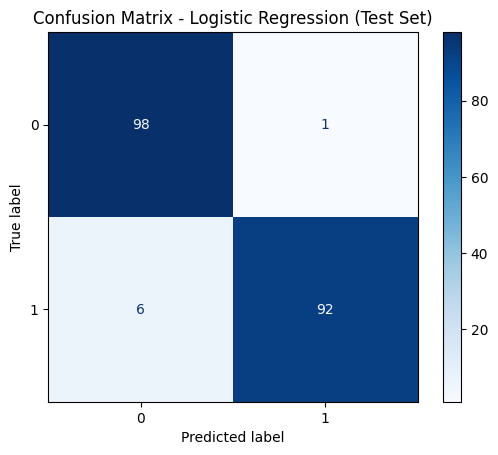

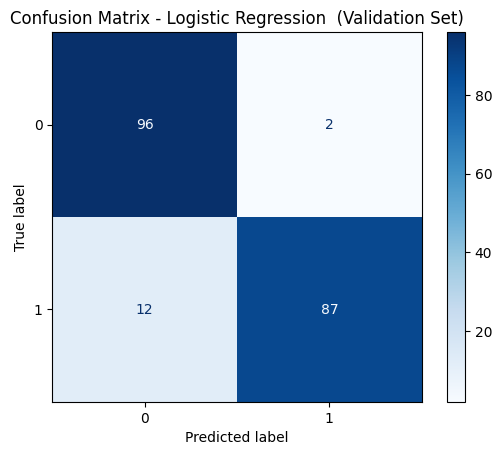

In [23]:
# Confusion Matrix for test set
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.show()

# Confusion Matrix for validation set
ConfusionMatrixDisplay.from_estimator(log_model, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression  (Validation Set)")
plt.show()

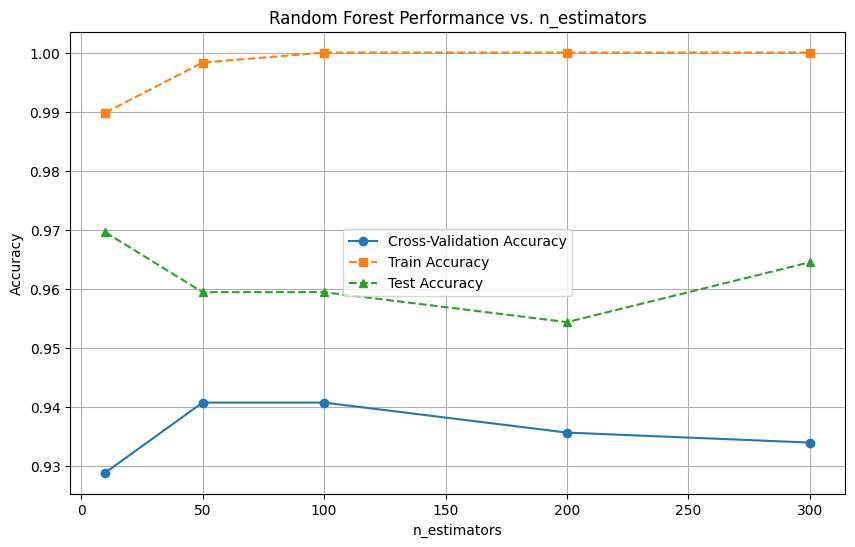

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = []
train_scores = []
test_scores = []

estimators_range = [10, 50, 100, 200, 300]

for n in estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Cross-validation accuracy
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)
    
    # Train/test accuracy
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, cv_scores, label="Cross-Validation Accuracy", marker='o')
plt.plot(estimators_range, train_scores, label="Train Accuracy", linestyle='--', marker='s')
plt.plot(estimators_range, test_scores, label="Test Accuracy", linestyle='--', marker='^')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance vs. n_estimators")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 6. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest_test")
evaluate_model(rf_model, X_val, y_val, "Random Forest_Val")


Model: Random Forest_test
Confusion Matrix:
 [[96  3]
 [ 5 93]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9505    0.9697    0.9600        99
           1     0.9688    0.9490    0.9588        98

    accuracy                         0.9594       197
   macro avg     0.9596    0.9593    0.9594       197
weighted avg     0.9596    0.9594    0.9594       197


Model: Random Forest_Val
Confusion Matrix:
 [[93  5]
 [12 87]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8857    0.9490    0.9163        98
           1     0.9457    0.8788    0.9110        99

    accuracy                         0.9137       197
   macro avg     0.9157    0.9139    0.9136       197
weighted avg     0.9158    0.9137    0.9136       197



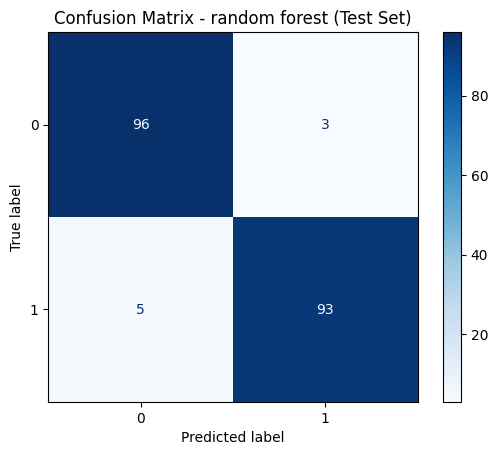

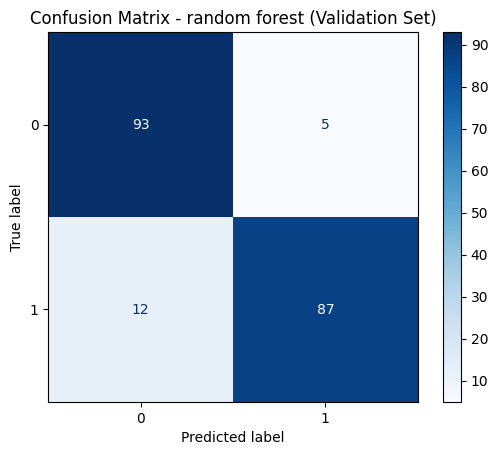

In [26]:
# Confusion Matrix for test set
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - random forest (Test Set)")
plt.show()

# Confusion Matrix for validation set
ConfusionMatrixDisplay.from_estimator(rf_model, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix - random forest (Validation Set)")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Grid search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (128, 64, 32)],
    'max_iter': [200, 300, 500, 700, 1000]
}

mlp = MLPClassifier(random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and cross-validation accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Get the best model from grid search
best_model = grid.best_estimator_

# Train accuracy
train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print(f"Train Accuracy: {train_acc:.4f}")

# Test accuracy
test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Best parameters: {'hidden_layer_sizes': (100,), 'max_iter': 500}
Best cross-validation accuracy: 0.9423754273282917
Train Accuracy: 0.9678
Test Accuracy: 0.9695


In [28]:
# 7. Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
evaluate_model(mlp_model, X_test, y_test, "nn_test")
evaluate_model(mlp_model, X_val, y_val, "Neural Network")


Model: nn_test
Confusion Matrix:
 [[98  1]
 [ 5 93]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9515    0.9899    0.9703        99
           1     0.9894    0.9490    0.9688        98

    accuracy                         0.9695       197
   macro avg     0.9704    0.9694    0.9695       197
weighted avg     0.9703    0.9695    0.9695       197


Model: Neural Network
Confusion Matrix:
 [[94  4]
 [ 9 90]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9126    0.9592    0.9353        98
           1     0.9574    0.9091    0.9326        99

    accuracy                         0.9340       197
   macro avg     0.9350    0.9341    0.9340       197
weighted avg     0.9351    0.9340    0.9340       197



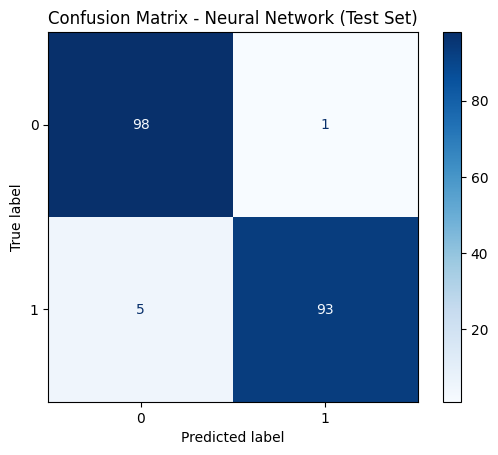

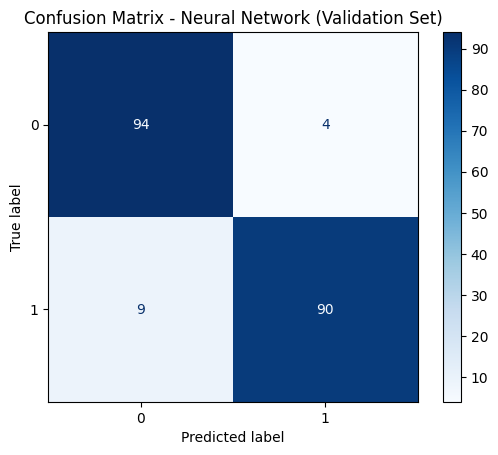

In [29]:
# Confusion Matrix for test set
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Neural Network (Test Set)")
plt.show()

# Confusion Matrix for validation set
ConfusionMatrixDisplay.from_estimator(mlp_model, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix - Neural Network (Validation Set)")
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=2)

# Initialize logistic regression model
model = LogisticRegression(max_iter=100)

# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Accuracy CV scores
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Average CV accuracy:", scores.mean())

# F1 score CV
f1 = cross_val_score(model, x, y, cv=5, scoring=make_scorer(f1_score))
print("Average F1 Score (CV):", f1.mean())

# Train model
model.fit(X_train, y_train)

# Accuracy on train and test sets
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Check for overfitting
if train_acc - test_acc > 0.1:
    print("⚠️ Possible Overfitting Detected")

Cross-validation accuracies: [0.94416244 0.94416244 0.94923858 0.91370558 0.94387755]
Average CV accuracy: 0.9390293173106807
Average F1 Score (CV): 0.9281550464533576
Train Accuracy: 0.9466327827191868
Test Accuracy: 0.9390862944162437


In [31]:
model = RandomForestClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Average CV accuracy:", scores.mean())


f1 = cross_val_score(model, x, y, cv=5, scoring=make_scorer(f1_score))
print("Average F1 Score (CV):", f1.mean())

model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

if train_acc - test_acc > 0.1:
    print("⚠️ Possible Overfitting Detected")


Cross-validation accuracies: [0.96446701 0.93908629 0.94923858 0.92385787 0.94387755]
Average CV accuracy: 0.9441054594426603
Average F1 Score (CV): 0.939332507014272
Train Accuracy: 1.0
Test Accuracy: 0.9187817258883249


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=2)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Cross-validation accuracy
cv_scores = cross_val_score(mlp_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())

# Cross-validation F1 Score
f1_scores = cross_val_score(mlp_model, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))
print("Average F1 Score (CV):", f1_scores.mean())

# Train the model on the full training data
mlp_model.fit(X_train, y_train)

# Train and Test accuracy
train_acc = mlp_model.score(X_train, y_train)
test_acc = mlp_model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Check for overfitting
if train_acc - test_acc > 0.1:
    print("⚠️ Possible Overfitting Detected")

Cross-validation accuracies: [0.5        0.49367089 0.50955414 0.49681529 0.51592357]
Average CV accuracy: 0.5031927759413045
Average F1 Score (CV): 0.541640884123267
Train Accuracy: 0.6378653113087674
Test Accuracy: 0.6446700507614214
